In [16]:
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [17]:
dir = 'C:/Users/sol/Downloads/Compressed/leapGestRecog'

In [18]:
images = []
labels = []
for directory in os.listdir(dir):
  for subDir in os.listdir(os.path.join(dir,directory)):
    for img in os.listdir(os.path.join(dir, directory, subDir)):
      img_path = os.path.join(dir, directory, subDir, img)
      images.append(img_path)
      labels.append(subDir)

In [19]:
# images = np.array(images)
# labels = np.array(labels)
# labels

In [20]:
Iseries = pd.Series(images, name="Images")
Lseries = pd.Series(labels, name="labels")
hand_gesture_data = pd.concat([Iseries, Lseries], axis=1)
hand_gesture_df = pd.DataFrame(hand_gesture_data)

In [21]:
print(hand_gesture_df.head())

                                              Images   labels
0  C:/Users/sol/Downloads/Compressed/leapGestReco...  01_palm
1  C:/Users/sol/Downloads/Compressed/leapGestReco...  01_palm
2  C:/Users/sol/Downloads/Compressed/leapGestReco...  01_palm
3  C:/Users/sol/Downloads/Compressed/leapGestReco...  01_palm
4  C:/Users/sol/Downloads/Compressed/leapGestReco...  01_palm


In [22]:
# Count the images in each class
pd.Series(labels).value_counts()

01_palm          2000
03_fist          2000
04_fist_moved    2000
05_thumb         2000
06_index         2000
07_ok            2000
08_palm_moved    2000
09_c             2000
10_down          2000
02_l             2000
05                 10
08                 10
07                 10
06                 10
00                 10
04                 10
03                 10
02                 10
01                 10
09                 10
Name: count, dtype: int64

In [23]:
X_train, X_test = train_test_split(hand_gesture_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(hand_gesture_df, test_size=0.3, random_state=42)

In [24]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="Images",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=4,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= X_test,x_col="Images", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=4,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="Images", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=4,
                                    shuffle=False
                                   )

Found 14004 validated image filenames belonging to 10 classes.
Found 3997 validated image filenames belonging to 10 classes.


C:\Users\sol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 66 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(
C:\Users\sol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 23 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


Found 5996 validated image filenames belonging to 10 classes.


C:\Users\sol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 34 invalid image filename(s) in x_col="Images". These filename(s) will be ignored.
  warnings.warn(


In [25]:
classes=list(train.class_indices.keys())
print (classes)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [26]:
def show_hand_gesture(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

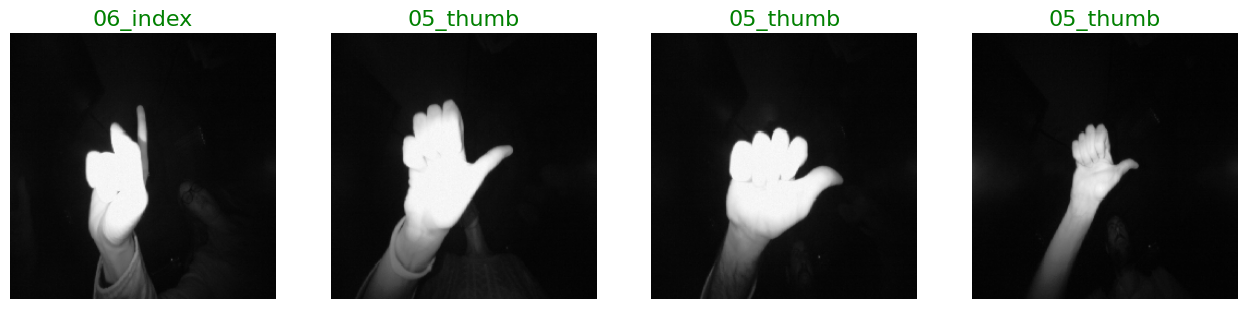

In [27]:
show_hand_gesture(train)

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

C:\Users\sol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 512)         │           2,0

 Total params: 15,617,674 (59.58 MB)

 Trainable params: 15,611,274 (59.55 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [30]:
history = model.fit(train, epochs=3, validation_data=val, verbose=1)

Epoch 1/3


C:\Users\sol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3501/3501 ━━━━━━━━━━━━━━━━━━━━ 5584s 2s/step - accuracy: 0.6385 - loss: 1.2694 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 2/3
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 5070s 1s/step - accuracy: 0.9935 - loss: 0.0264 - val_accuracy: 0.9998 - val_loss: 8.5571e-04
Epoch 3/3
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 5735s 2s/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 0.9998 - val_loss: 0.0010


In [31]:
model.evaluate(test, verbose=1)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 338s 338ms/step - accuracy: 1.0000 - loss: 2.3092e-04


[0.00037202934618107975, 1.0]

In [35]:
model.save("hand_gesture_recognition_model.keras")

In [36]:
#now getting results
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 359s 358ms/step


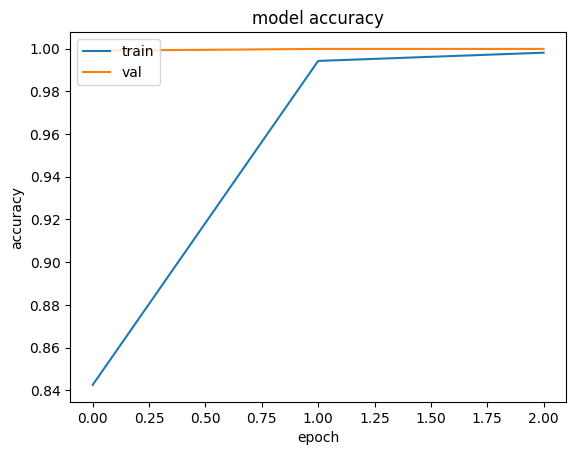

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

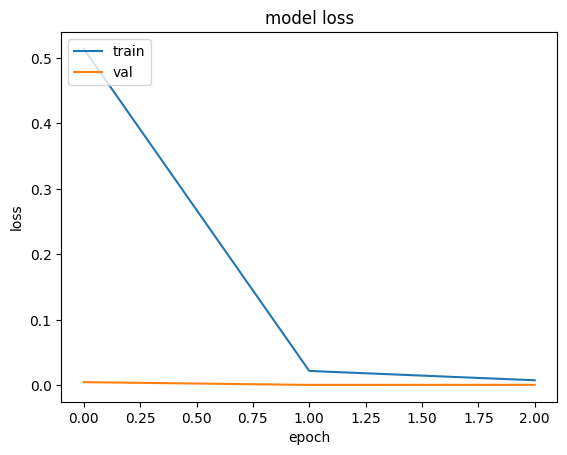

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Ensure y_test contains the true labels and pred2 contains the predicted labels
y_test = X_test.labels  # Make sure X_test has an attribute 'labels' containing the true labels

# Check if the lengths of y_test and pred2 match
print(f"Length of y_test: {len(y_test)}")
print(f"Length of pred2: {len(pred2)}")

if len(y_test) == len(pred2):
    # Print the classification report
    print(classification_report(y_test, pred2))

    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, pred2)
    print("Accuracy of the Model: {:.1f}%".format(accuracy * 100))

    # Optional: Print the confusion matrix if needed
    conf_matrix = confusion_matrix(y_test, pred2)
    print("Confusion Matrix:\n", conf_matrix)
else:
    print("Error: The lengths of y_test and pred2 do not match.")


Length of y_test: 4020
Length of pred2: 3997
Error: The lengths of y_test and pred2 do not match.


In [42]:
# Print lengths and sample elements of y_test and pred2
print(f"Length of y_test: {len(y_test)}")
print(f"Length of pred2: {len(pred2)}")

# Print first few elements to inspect
print("First few elements of y_test:", y_test[:10])
print("First few elements of pred2:", pred2[:10])

# Ensure they match
if len(y_test) == len(pred2):
    # Define class labels
    class_labels = ['Palm', 'l', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']

    # Generate confusion matrix
    cm = confusion_matrix(y_test, pred2)

    # Plot confusion matrix
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

    plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=class_labels, rotation=25)
    plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=class_labels, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.title("Confusion Matrix")

    plt.show()
else:
    print("Error: The lengths of y_test and pred2 do not match.")


Length of y_test: 4020
Length of pred2: 3997
First few elements of y_test: 11866          10_down
3043          06_index
5456     08_palm_moved
2405           03_fist
15567    08_palm_moved
15244            07_ok
15720             09_c
11355            07_ok
2090           01_palm
11315            07_ok
Name: labels, dtype: object
First few elements of pred2: ['10_down', '06_index', '08_palm_moved', '03_fist', '08_palm_moved', '07_ok', '09_c', '07_ok', '01_palm', '07_ok']
Error: The lengths of y_test and pred2 do not match.
